In [43]:
"""Example showing different sampling strategies"""

# Copyright (c) 2024 Alliance for Sustainable Energy, LLC

# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.

# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

__authors__ = ["Weslley S. Pereira"]
__contact__ = "weslley.dasilvapereira@nrel.gov"
__maintainer__ = "Weslley S. Pereira"
__email__ = "weslley.dasilvapereira@nrel.gov"
__credits__ = ["Weslley S. Pereira"]
__version__ = "0.4.1"
__deprecated__ = False

In [44]:
from blackboxopt.sampling import NormalSampler, Sampler, SamplingStrategy
import numpy as np

def scatter_hist(x, y, ax, ax_histx, ax_histy):
    """From: https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html"""
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.05
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

def plot_sample_2d(sample, bounds):
    """Adapted from: https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html"""
    import matplotlib.pyplot as plt

    # Create a Figure, which doesn't have to be square.
    fig = plt.figure(layout='constrained')

    # Create the main axes, leaving 25% of the figure space at the top and on the
    # right to position marginals.
    ax = fig.add_gridspec(top=0.75, right=0.75).subplots()

    # The main axes' aspect can be fixed.
    ax.set(aspect=1)

    # Create marginal axes, which have 25% of the size of the main axes.  Note that
    # the inset axes are positioned *outside* (on the right and the top) of the
    # main axes, by specifying axes coordinates greater than 1.  Axes coordinates
    # less than 0 would likewise specify positions on the left and the bottom of
    # the main axes.
    ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)

    # Draw the scatter plot and marginals.
    scatter_hist(sample[:, 0], sample[:, 1], ax, ax_histx, ax_histy)

    ax.set_xlim(bounds[0])
    ax.set_ylim(bounds[1])
    plt.show()

In [45]:
m = 100
dim = 2
bounds = [(0, 1)] * dim
lb = np.array([b[0] for b in bounds])
ub = np.array([b[1] for b in bounds])
sigma = 0.1
mu = lb + (ub - lb) / 2
probability = 0.8

Sampling 100 points using a random uniform distribution


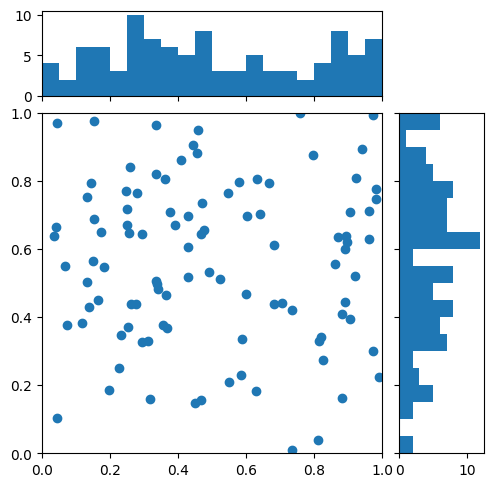

In [46]:
print("Sampling", m, "points using a random uniform distribution")
samples = Sampler(m).get_uniform_sample(bounds)
plot_sample_2d(samples, bounds)

Sampling 100 points using SLHD


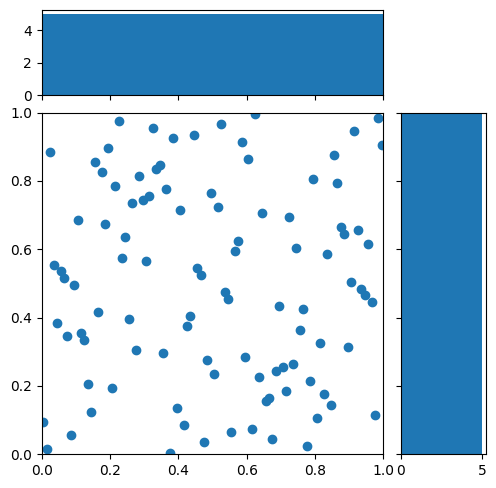

In [47]:
print("Sampling", m, "points using SLHD")
samples = Sampler(m).get_slhd_sample(bounds)
plot_sample_2d(samples, bounds)

Sampling 100 points using a normal distribution with sigma 0.1 and mu [0.5 0.5]


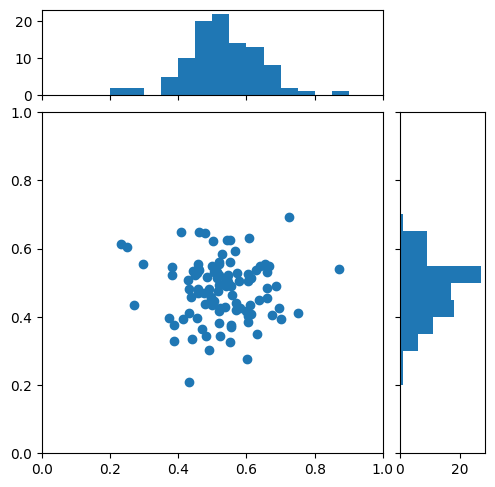

In [48]:
print(
    "Sampling",
    m,
    "points using a normal distribution with sigma",
    sigma,
    "and mu",
    mu,
)
samples = NormalSampler(m, sigma).get_normal_sample(bounds, mu=mu)
plot_sample_2d(samples, bounds)

Sampling 100 points using a DDS distribution with sigma 0.1 mu [0.5 0.5] and perturbation probability 0.8


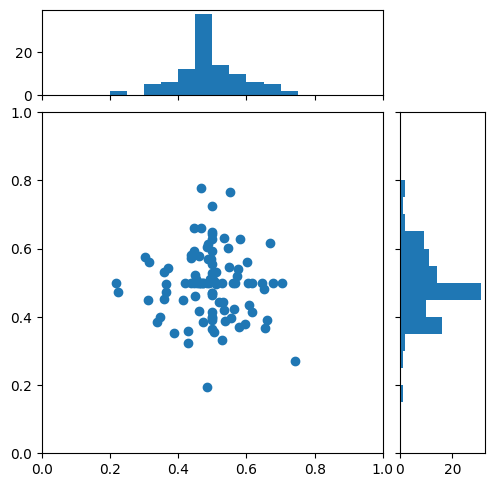

In [49]:
print(
    "Sampling",
    m,
    "points using a DDS distribution with sigma",
    sigma,
    "mu",
    mu,
    "and perturbation probability",
    probability,
)
samples = NormalSampler(m, sigma).get_dds_sample(
    bounds, mu=mu, probability=probability
)
plot_sample_2d(samples, bounds)

Sampling 100 points using a DDS-UNIFORM distribution with sigma 0.1 mu [0.5 0.5] and perturbation probability 0.8


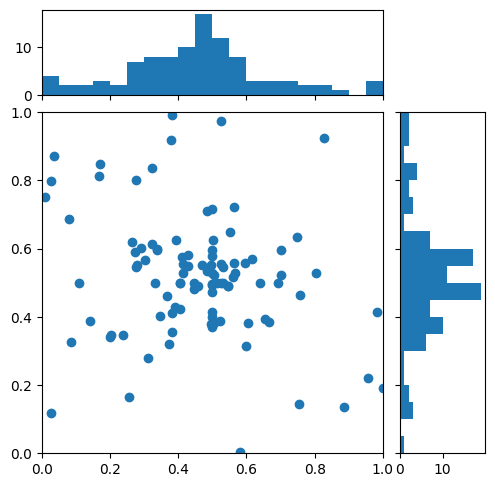

In [50]:
print(
    "Sampling",
    m,
    "points using a DDS-UNIFORM distribution with sigma",
    sigma,
    "mu",
    mu,
    "and perturbation probability",
    probability,
)
samples = NormalSampler(
    m, sigma, strategy=SamplingStrategy.DDS_UNIFORM
).get_sample(bounds, mu=mu, probability=probability)
plot_sample_2d(samples, bounds)